In [10]:
from TransformingCity import TransformingCity, LandUseViewer, PopulationViewer

import numpy as np
import matplotlib.pyplot as plt
import thinkplot

%matplotlib inline
from matplotlib import rc
rc('animation', html='html5')

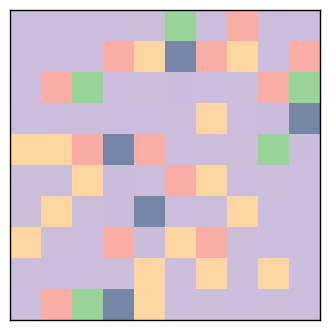

In [11]:
city = TransformingCity(10)
city.array = city.landuse # default array is landuse
viewer = LandUseViewer(city)
anim = viewer.animate()

In [12]:
anim

In [13]:
print(city.array)

[[1 1 1 1 1 6 1 3 1 1]
 [1 1 1 3 2 5 3 2 1 3]
 [1 3 6 1 1 1 1 1 3 6]
 [1 1 1 1 1 1 2 1 1 5]
 [2 2 3 5 3 1 1 1 6 1]
 [1 1 2 1 1 3 2 1 1 1]
 [1 2 1 1 5 1 1 2 1 1]
 [2 1 1 3 1 2 3 1 1 1]
 [1 1 1 1 2 1 2 1 2 1]
 [1 3 6 5 2 1 1 1 1 1]]


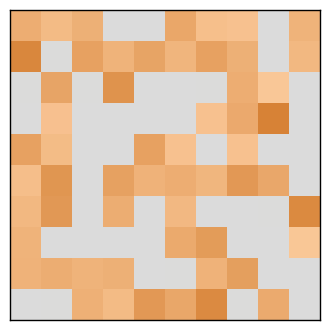

In [14]:
city = TransformingCity(10)
city.step()
city.array = city.pop_count # default array is landuse
viewer = PopulationViewer(city)
anim = viewer.animate()

In [15]:
anim

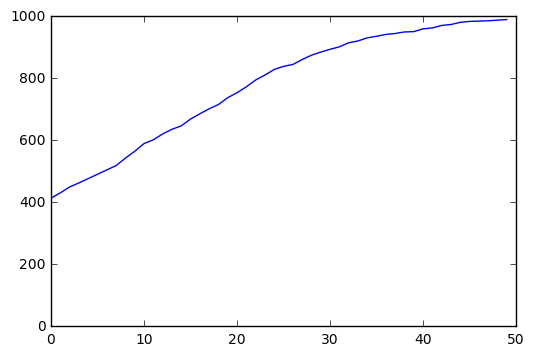

In [16]:
#The smaller the city, the more agents get displaced, because creative density is higher.
#the whole time.
city = TransformingCity(7)
for i in range(50):
    city.step()
    
plt.plot(city.displaced_history)
plt.ylim([0, 1000])
plt.show()

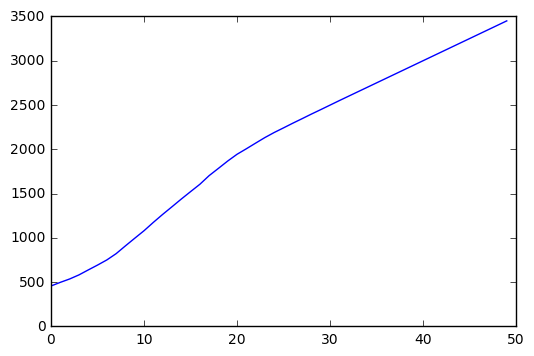

In [17]:
#A smaller city with new agents moving in means that...
#more agents get displaced, because creative density gets EVEN higher.
city = TransformingCity(7)
steps = 50
n_to_add_per_step = 50
for i in range(steps):
    city.step()
    city.add_agents(n_to_add_per_step)
    
plt.plot(city.displaced_history)
plt.ylim([0, 1000 + steps*n_to_add_per_step])
plt.show()

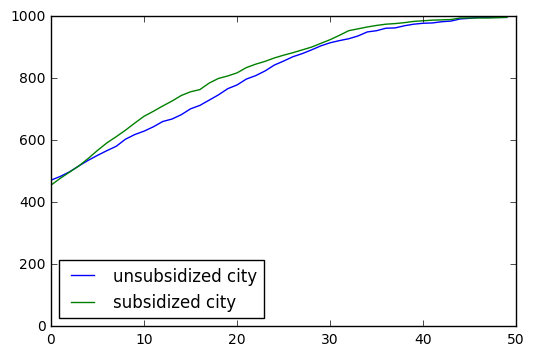

In [21]:
#The smaller the city, the more agents get displaced, because creative density is higher.
#the whole time.
city = TransformingCity(7)
sub_city = TransformingCity(7, p_subsidized = .1)


for i in range(50):
    city.step()
    sub_city.step()
    
plt.plot(city.displaced_history, label='unsubsidized city')
plt.plot(sub_city.displaced_history, label='subsidized city')
plt.legend(loc='best')
plt.ylim([0, 1000])
plt.show()

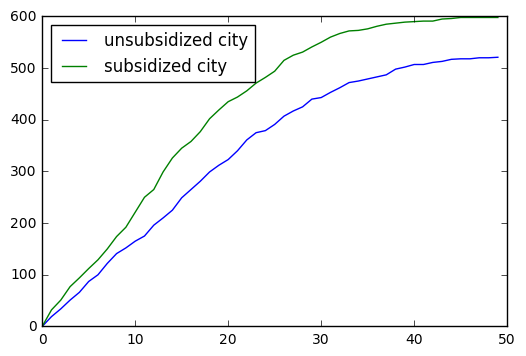

In [27]:
city = TransformingCity(7)
sub_city = TransformingCity(7, p_subsidized = .1)


for i in range(50):
    city.step()
    sub_city.step()
    
unsubnormalized = [x - city.displaced_history[0] for x in city.displaced_history]
subnormalized = [x - sub_city.displaced_history[0] for x in sub_city.displaced_history]
plt.plot(unsubnormalized, label='unsubsidized city')
plt.plot(subnormalized, label='subsidized city')
plt.legend(loc='best')
# plt.ylim([0, 1000])
plt.show()

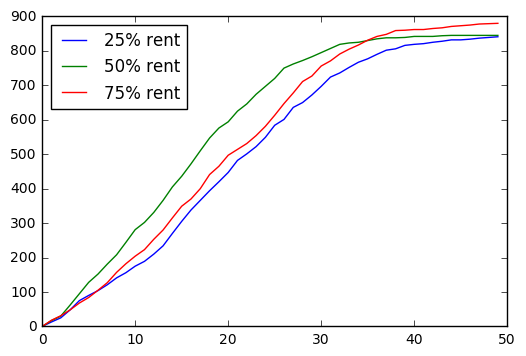

In [73]:
np.random.seed(40)
city_quarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.25)
city_half = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.5)
city_threequarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.75)

for i in range(50):
    city_quarter.step()
    city_half.step()
    city_threequarter.step()
    
quarter = [x - city_quarter.displaced_history[0] for x in city_quarter.displaced_history]
half = [x - city_half.displaced_history[0] for x in city_half.displaced_history]
threequarter = [x - city_threequarter.displaced_history[0] for x in city_threequarter.displaced_history]

plt.plot(quarter, label='25% rent')
plt.plot(half, label='50% rent')
plt.plot(threequarter, label='75% rent')
plt.legend(loc='best')
plt.show()